# Linear Regression 

## Step 1: Decide a Loss funcion

    - Let's choose squared loss (standard for Linear Regression)

$$l(y,\hat{y}) = (\hat{y}-y)^2$$ 

    - It is symmetric : would punish under/over prediction equally
    - Its squared: would punish the larger mistakes more than the smaller ones 
    - With all the caveat, let' go ahead with the above loss function
    

## Step 2: Find the parameters 

- Find parameters $w$ such that: 
$$w^{*} = {argmin}_{w}\sum_{i=1}^{N} (y_i - \hat{y})^2$$ 

- And we have a closed form solution for this: 

$$w^* =(X^{T}X)^{-1}X^{T}y $$


In [29]:
## Let me try this out 

## Set up necessary packages

%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# load some data
# Dataset: Housing price data (very uninteresting, but its fine), against proximity to CBD 

train_data = np.loadtxt('datasets/housing-train.txt')
val_data = np.loadtxt('datasets/housing-val.txt')

print(train_data.shape)
print(val_data.shape)

# we dont have much data, but its fine to see the workings

(304, 2)
(101, 2)


In [23]:
# settin up np arrays to work 
# np.newaxis because we need an array in 2 dimension like N*1 than 1 dimensiton like (N,)
X_train = train_data[:,np.newaxis,0]
y_train = train_data[:,np.newaxis,1]
X_val = val_data[:,np.newaxis,0]
y_val = val_data[:,np.newaxis,1]

## Step 3: Explore the data 

- Future Note: Make this as a first step itself, define loss function and model class based on this!

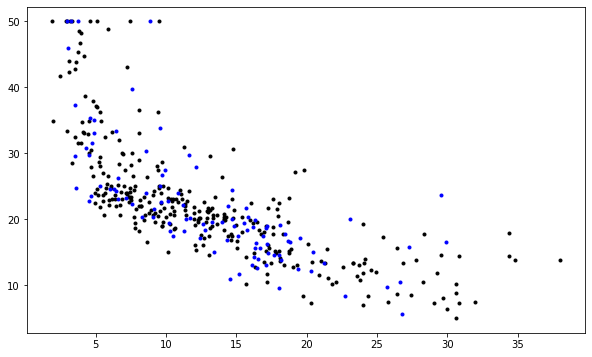

In [34]:
plt.figure(figsize=(10,6))
plt.plot(X_train, y_train, ".k") 
plt.plot(X_val, y_val, ".b")

- okay, seems like mostly linear relationship, with edges getting a bit not linear,

## Step 4 : find W* and define loss functions

In [59]:
# let's define some functions

## to get w*

def find_least_squared_w(X,y):
    '''
    find w* using closed form solution.
    
    Input:
        X = 2D array, N*(D+1) data matrix
        y = 1D array, N lenghth vector of y values
    Output:
        w = 1D array, (D+1) lengthe vector 
    '''
    
    w = np.dot(np.linalg.pinv(X),y)
    
    return w

def find_avg_squared_loss(X,y,w):
    '''
    Finds the avg squared loss for the given dataset 
    Input:
         X = 2D array, N*(D+1) data matrix
         y = 1D array, N lenghth vector of y values
    Output:
        val = scaler with range(0,inf)
    
    '''
    y_hat = np.dot(X,w)
    error = y - y_hat
    
    squared_loss = (np.dot(np.transpose(error),error)) / X.shape[0] 
    return squared_loss
    
# let's prepare the X dataset 
def prepare_X(X, degree = 1):
    '''
    this functions prepared X dataset, by adding a column of ones and other degrees 
    '''
    
    X_new = X.copy()
    
    if degree > 1:
        
        for d in range(1, degree+1):
            X_new = np.hstack((X_new, X**d))
         
    X_new = np.hstack((np.ones([X_new.shape[0],1]),X_new))
    
    return X_new

In [63]:
X_train_prepared_4 = prepare_X(X_train, degree=4)
w_4 = find_least_squared_w(X_train_prepared_4, y_train)
loss_4 = find_avg_squared_loss(X_train_prepared_4, y_train, w_4) 
loss_4

array([[28.09284532]])

#### So all the functions seem to be working

In [67]:
# let's evaluate this with a few degrees

val_loss_bookkeeping = {}

for i in range(1,10):
    my_x = prepare_X(X_train, degree=i)
    my_w = find_least_squared_w(my_x, y_train)
    train_loss = find_avg_squared_loss(my_x, y_train, my_w)
    
    my_x_val = prepare_X(X_val, degree=i)
    val_loss = find_avg_squared_loss(my_x_val, y_val, my_w)
    
    val_loss_bookkeeping[i] = val_loss
    
    

In [68]:
val_loss_bookkeeping

{1: array([[40.23491995]]),
 2: array([[31.72787159]]),
 3: array([[31.24633017]]),
 4: array([[32.31931854]]),
 5: array([[31.27491765]]),
 6: array([[31.02879223]]),
 7: array([[31.10300865]]),
 8: array([[31.9585717]]),
 9: array([[31.62424788]])}

### Best model would be one with 6 degrees